Things to know before -

This is Logistic Regression from scratch. This is done and implemented in a way that this can easily be extended to Neural Networks.

For now, we can assume this to be a single Neuron with one output.

Formulas -

Compact form -

z = w.T X + b -> a = sigmoid(z) -> Loss l(a,y) = - [y * log(a) + (1-y) * log(1-a)]

Our goal - Find optimal w* and b* that minimizes the Loss.

Disclamer- We can write the whole formula in one line,
loss(w,b) =  -[ y * log(sigmoid(w.T X + b)) + (1-y) - log(1-sigmoid(w.T X+ b))]
We can minimize this also, but it gets a bit messy.

We are going to use the compact form to keep everything nice and clean.

Our goal is to get dl/dz. We can achieve that by finding dl/da * da/dz (chain rule).

dl/da= (a-y)/ a(1-a)

da/dz= a * (1-a)

=> dl/dz = a-y

Now, to update w after each iteration, we need to find dl/dw.

dl/dw = dl/dz * dz/dw

dz/dw = X

=> dl/dw= (a-y)*X

similarly update for b- 

dl/db = dl/dz*dz/db

dz/db= 1 

dl/db = a-y



***********************

**final update for all w's, w= 1/n * learning_rate * (a-y) * X**

**final update for all b's, w= 1/n * learning_rate * (a-y)**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn.linear_model import LogisticRegression
from math import sqrt
from numpy.random import rand

# Custom Network

In [2]:
def generate_data():
  X,y=make_classification(n_samples=1000,n_features=10,random_state=42) # Generating random data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  lr=0.001
  lamb=0.01
  y_train=y_train.reshape(y_train.shape[0],1)
  y_test=y_test.reshape(y_test.shape[0],1)
  return X_train.T, X_test.T, y_train.T, y_test.T,lr,lamb

We have 1000 samples with each sample having 10 features.

Adding 1 to features to account for the bias term.

In [3]:
def relu(x):
    return np.maximum(x, 0)

In [4]:
def d_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [5]:
def sigmoid(z):
  a= 1 / ( 1 + np.exp(-(z))  ) 
  return a

In [6]:
def d_sigmoid(a): # Derivative of sigmoid
  return a * (1-a)

In [7]:
def softmax(z):
    expz = np.exp(z)
    return expz/np.sum(expz, axis = 0)

In [8]:
def forward_prop(w1,w2,w3,b1,b2,b3,X,activation):
  if activation=='sigmoid':
    z1=w1.T.dot(X) + b1
    a1=sigmoid(z1) 
    z2=w2.T.dot(a1) + b2   #1 10 10 670  1 670
    a2=sigmoid(z2)
    z3=w3.T.dot(a2) + b3  
    a3=sigmoid(z3)
  else:
    z1=w1.T.dot(X) + b1
    a1=relu(z1) 
    z2=w2.T.dot(a1) + b2   #1 10 10 670  1 670
    a2=relu(z2)
    z3=w3.T.dot(a2) + b3  
    a3=relu(z3)

  return a1,a2,a3,z1,z2,z3

In [9]:
def back_prop(X,a1,a2,a3,y,z1,z2,z3,m,w1,w2,w3,activation):
  if activation=='sigmoid':
    dz3=   a3-y   # 1 x 670
    dw3 =   a2.dot(dz3.T)   #1 x 670  10 x 670 ,,  >>>>> 10 670 670 1 = 10 x 1
    db3= (1/m) * dz3 # 1 x 670

    dl_da2= w3.dot((a3-y))  # 1 670  10 1 >>> 10 1   1 670 = 10 670 
    dz2=  dl_da2 * d_sigmoid(a2) # 10 670 * 10 670
    dw2 = (1/m) * a1.dot(dz2.T)    #  10 670  10 670 >>> 10 670  670 10 = 10 10
    db2=  (1/m) * dz2 # 10 670

    dl_da1 = w2.T.dot(dz2) # 10 670 10 10 >>> 10 10 10 670 = 10 670
    dz1= dl_da1 * d_sigmoid(a1) # 10 670
    dw1= (1/m) * X.dot(dz1.T) # 10 670 10 670 >>>>  10 670 670 10 = 10 10
    db1 = (1/m) * dz1 # 10 670
    

    db1= np.sum(db1,1,keepdims=True)
    db2= np.sum(db2,1,keepdims=True)
    db3= np.sum(db3,1,keepdims=True)
  else:
    dz3=   a3-y # 1 x 670
    dw3 =   a2.dot(dz3.T)   #1 x 670  10 x 670 ,,  >>>>> 10 670 670 1 = 10 x 1
    db3= (1/m) * dz3 # 1 x 670

    dl_da2= w3.dot((a3-y))  # 1 670  10 1 >>> 10 1   1 670 = 10 670 
    dz2=  dl_da2 * d_relu(a2) # 10 670 * 10 670
    dw2 = (1/m) * a1.dot(dz2.T)    #  10 670  10 670 >>> 10 670  670 10 = 10 10
    db2=  (1/m) * dz2 # 10 670

    dl_da1 = w2.T.dot(dz2) # 10 670 10 10 >>> 10 10 10 670 = 10 670
    dz1= dl_da1 * d_relu(a1) # 10 670
    dw1= (1/m) * X.dot(dz1.T) # 10 670 10 670 >>>>  10 670 670 10 = 10 10
    db1 = (1/m) * dz1 # 10 670
    

    db1= np.sum(db1,1,keepdims=True)
    db2= np.sum(db2,1,keepdims=True)
    db3= np.sum(db3,1,keepdims=True)


  #print('dz3',dz3.shape)
  #print('w1,dw1', w1.shape,dw1.shape,'w2,dw2', w2.shape,dw2.shape,'w3,dw3', w3.shape,dw3.shape,'b1,db1', b1.shape,db1.shape,'b2,db2', b2.shape,db2.shape,'b3,db3', b3.shape,db3.shape)

  return dw1,dw2,dw3,db1, db2,db3

In [10]:
def update_params(w1,w2,w3,dw1,dw2,dw3,b1,b2,b3,db1,db2,db3,lr):
  return w1- (lr * dw1), w2 - (lr*dw2), w3 - (lr*dw3) , b1- (lr * db1) ,b2- (lr * db2), b3- (lr * db3) 

In [11]:
def initialize_params(X,activation):
  if activation == 'sigmoid':
    
    # number of nodes in the previous layer
    n = 10
    # calculate the range for the weights in next layer
    m = 10
    
    lower, upper = -(sqrt(6.0) / sqrt(n + m)), (sqrt(6.0) / sqrt(n + m))
    
    w1=np.random.rand(X.shape[0],10) * (upper - lower) + lower
    w2=np.random.rand(10,10) * (upper - lower) + lower
    w3 = np.random.rand(10,1) * (upper - lower) + lower
    b1=np.zeros(shape=[10,1])
    b2=np.zeros(shape=[10,1])
    b3=np.zeros(shape=[1,1])
  else:
    # number of nodes in the previous layer
    n = 10
    # calculate the range for the weights
    std = sqrt(2.0 / n)
    
    w1=np.random.randn(X.shape[0],10)  * 0.001
    w2=np.random.randn(10,10) * 0.001
    w3 = np.random.randn(10,1) * 0.001
    b1=np.zeros(shape=[10,1])
    b2=np.zeros(shape=[10,1])
    b3=np.zeros(shape=[1,1])

  return w1,w2,w3,b1,b2,b3

In [12]:
def cost_function(a, y):
    m = y.shape[1]
    #cost=-(1/m)*np.sum(y*np.log(a2))
    cost = np.mean(     (-y*(np.log(a))).T - ((1-y)*np.log(1-a)).T       )
    return cost

In [13]:
def predict(w,X):
  return sigmoid(w.T.dot(X))

0.701912187912891
0.645531250244789
0.6053070445737023
0.5756468939251685
0.5530433273655659
0.5352350111129701
0.5207366327787184
0.5085539999727892
0.4980101494522129
0.48863753157235296


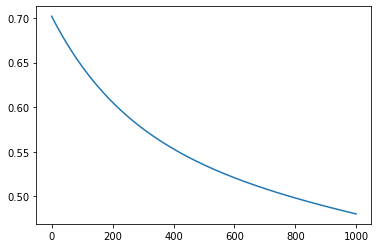

In [14]:
if __name__=='__main__':
  X_train, X_test, y_train, y_test,lr,lamb=generate_data()
  activation = 'sigmoid'
  w1,w2,w3,b1,b2,b3=initialize_params(X_train,activation) 
  cost=[]
  for i in range(0,1000):
    a1,a2,a3,z1,z2,z3=forward_prop(w1,w2,w3,b1,b2,b3,X_train,activation)
    cost.append(cost_function(a3,y_train))
    if (i%100==0):
      print(cost_function(a3,y_train))
    dw1,dw2,dw3,db1,db2,db3=back_prop(X_train,a1,a2,a3,y_train,z1,z2,z3,X_train.shape[1],w1,w2,w3,activation)
    w1,w2,w3,b1,b2,b3= update_params(w1,w2,w3,dw1,dw2,dw3,b1,b2,b3,db1,db2,db3,lr)

t = np.arange(0, 1000)
plt.plot(t, cost)
plt.show()

In [15]:
a3 = a3 > 0.5  
a3 = np.array(a3, dtype = 'int64')
print('acc on train set',m.accuracy_score(y_train.T,a3.T  ))

a1,a2,a3,z1,z2,z3=forward_prop(w1,w2,w3,b1,b2,b3,X_test,activation)
a3 = a3 > 0.5  
a3 = np.array(a3, dtype = 'int64')
print('acc on test set',m.accuracy_score(y_test.T,a3.T))

acc on train set 0.7611940298507462
acc on test set 0.7696969696969697


In [16]:
clf=LogisticRegression()
clf.fit(X_train.T,y_train.T)
preds=clf.predict(X_test.T)
test=y_test.reshape(y_test.shape[1],)
print('sklearn accuracy on test',m.accuracy_score(test,preds))

sklearn accuracy on test 0.8454545454545455


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
